In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 指定默认字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']  

In [2]:
github_file2_path = r'C:\Users\yst\Desktop\github\repository_data.csv'
df = pd.read_csv(github_file2_path).head(2000)
print(df.head())

                          name  stars_count  forks_count  watchers  \
0                 freeCodeCamp       359805        30814      8448   
1                      996.ICU       264811        21470      4298   
2       free-programming-books       262380        53302      9544   
3  coding-interview-university       244927        65038      8539   
4                      awesome       235223        24791      7446   

   pull_requests primary_language  \
0          31867       TypeScript   
1           1949              NaN   
2           8235              NaN   
3            867              NaN   
4           1859              NaN   

                                      languages_used  commit_count  \
0  ['TypeScript', 'JavaScript', 'CSS', 'Shell', '...       32231.0   
1                                                NaN        3189.0   
2                                                NaN        8286.0   
3                                                NaN        2314.0   
4     

In [3]:
# 筛选标称列
categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_column = categorical_df.columns
# 给出各标称属性的频数
for name in categorical_column:
    # 输出标称属性的取值及对应频数（只显示前五行）
    print(categorical_df[name].value_counts().head())

name
Python       3
hosts        3
wiki         2
cli          2
interview    2
Name: count, dtype: int64
primary_language
JavaScript    398
Python        215
TypeScript    200
Go            167
Java          142
Name: count, dtype: int64
languages_used
['JavaScript']                  64
['Python']                      45
['Java']                        26
['JavaScript', 'HTML']          25
['TypeScript', 'JavaScript']    22
Name: count, dtype: int64
created_at
2014-12-24T17:49:19Z    1
2014-04-04T13:54:37Z    1
2012-08-08T16:25:52Z    1
2013-04-10T19:47:33Z    1
2017-09-08T21:09:04Z    1
Name: count, dtype: int64
licence
MIT License                                809
Apache License 2.0                         330
Other                                      304
GNU General Public License v3.0             89
BSD 3-Clause "New" or "Revised" License     58
Name: count, dtype: int64


In [4]:
# 筛选数值列
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_column = numeric_df.columns
# 给出数值列的五数概括及缺失值个数
for name in numeric_column:
    # 输出五数概括
    print("列{0}的五数概括为:\n{1}".format(name, numeric_df[name].describe()))
    # 输出缺失值个数
    print("列{0}的缺失值个数为:{1}".format(name, numeric_df[name].isnull().sum()))

列stars_count的五数概括为:
count      2000.000000
mean      21233.802500
std       24084.899593
min        3864.000000
25%       13199.750000
50%       16368.000000
75%       21651.500000
max      359805.000000
Name: stars_count, dtype: float64
列stars_count的缺失值个数为:0
列forks_count的五数概括为:
count     2000.00000
mean      3865.59200
std       6608.72718
min         71.00000
25%       1192.75000
50%       2246.00000
75%       3994.50000
max      87667.00000
Name: forks_count, dtype: float64
列forks_count的缺失值个数为:0
列watchers的五数概括为:
count    2000.000000
mean      603.428500
std       826.917166
min        17.000000
25%       229.000000
50%       398.500000
75%       657.250000
max      9544.000000
Name: watchers, dtype: float64
列watchers的缺失值个数为:0
列pull_requests的五数概括为:
count      2000.000000
mean       2129.285500
std        6852.399913
min           0.000000
25%         114.000000
50%         441.000000
75%        1555.500000
max      133434.000000
Name: pull_requests, dtype: float64
列pull_requests的缺失值个

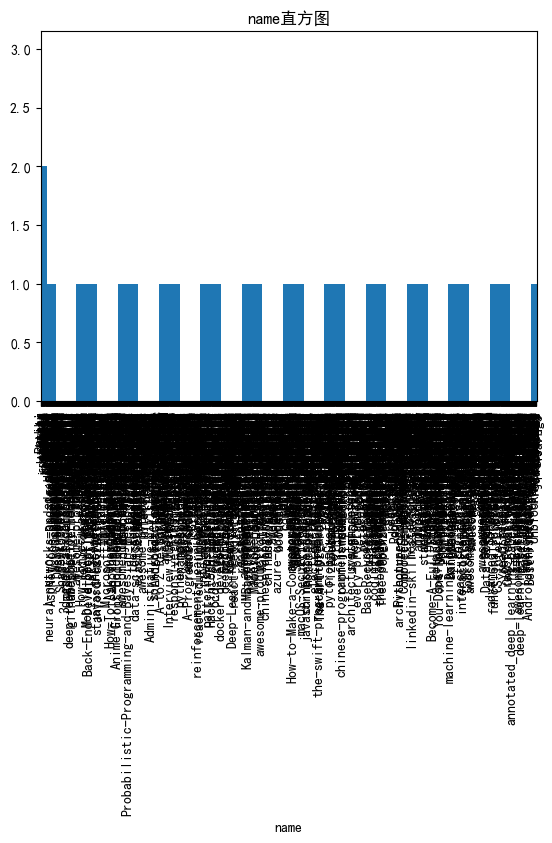

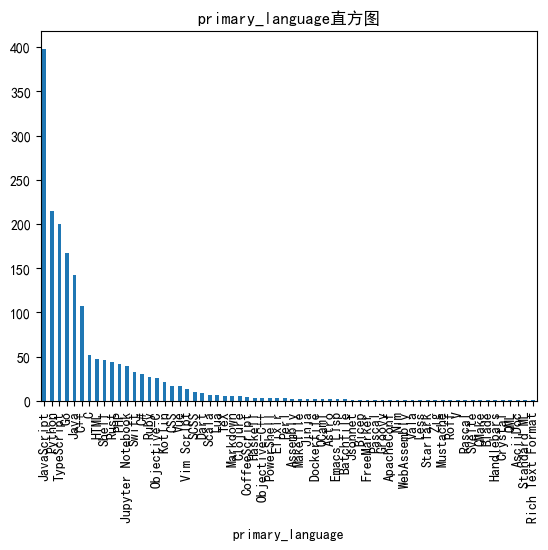

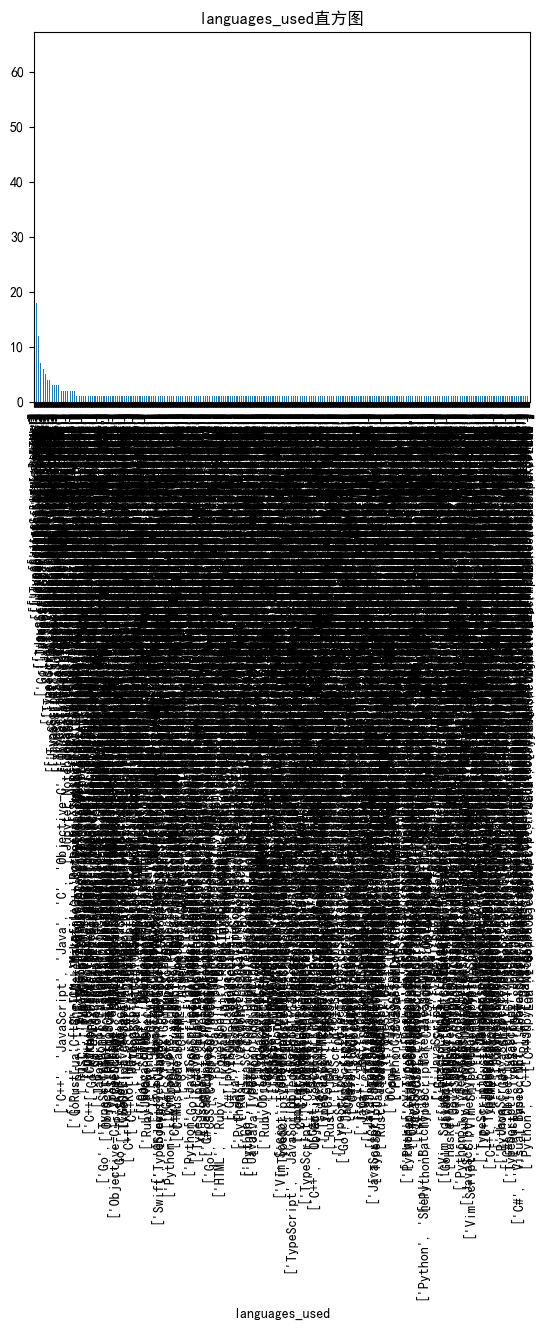

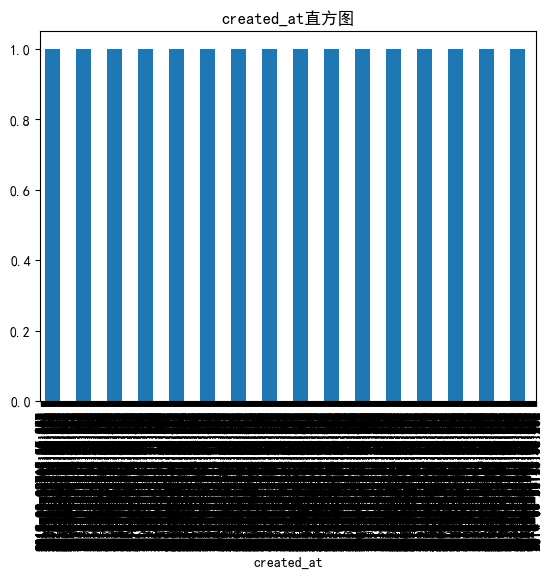

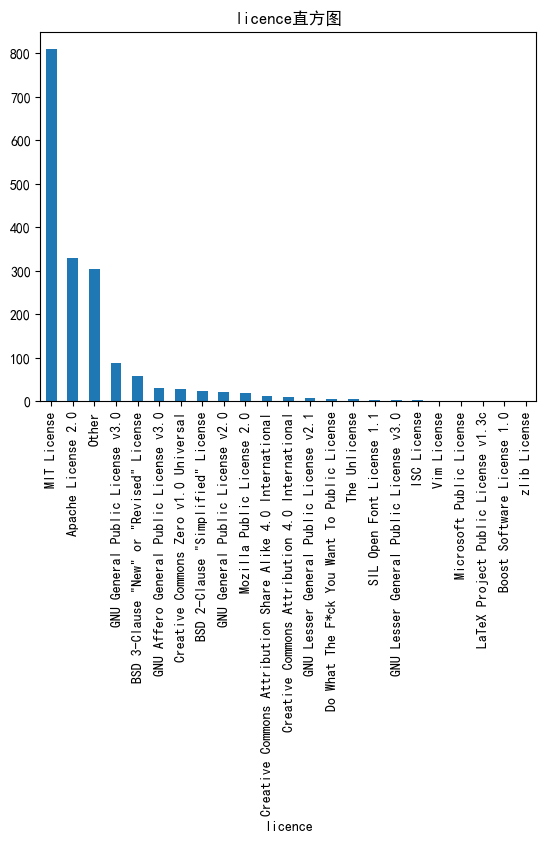

In [5]:
# 为标称列绘制直方图
for name in categorical_column:
    categorical_df[name].value_counts().plot(kind='bar')
    plt.title(str(name) + "直方图")
    plt.show()

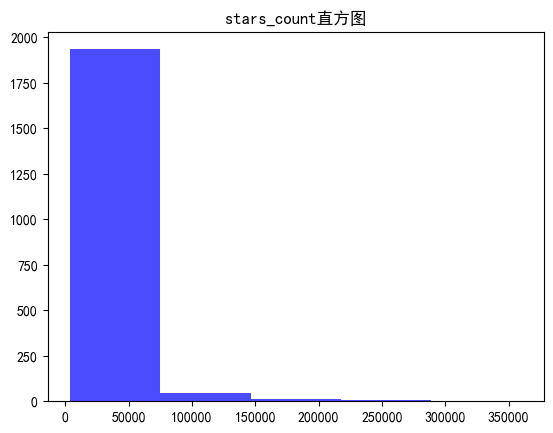

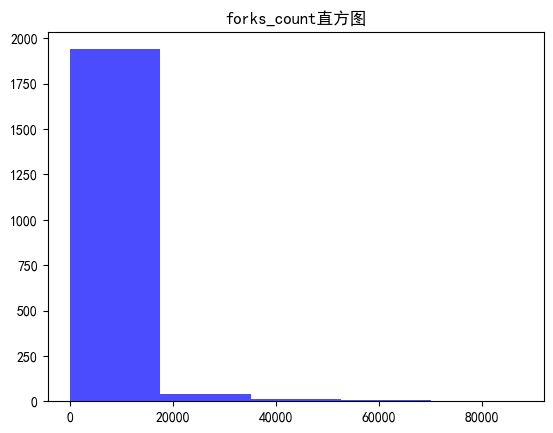

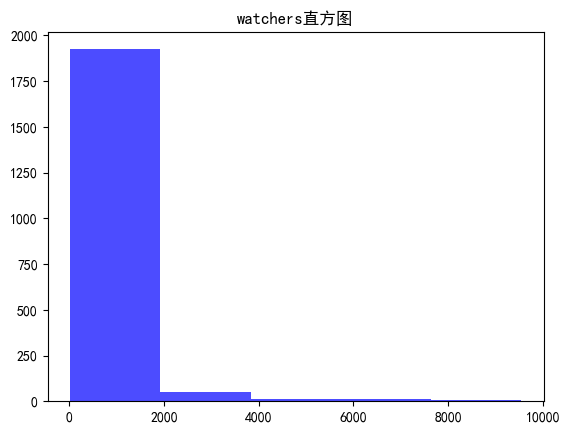

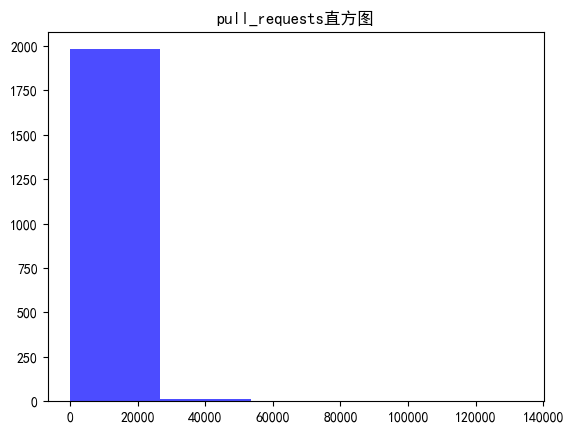

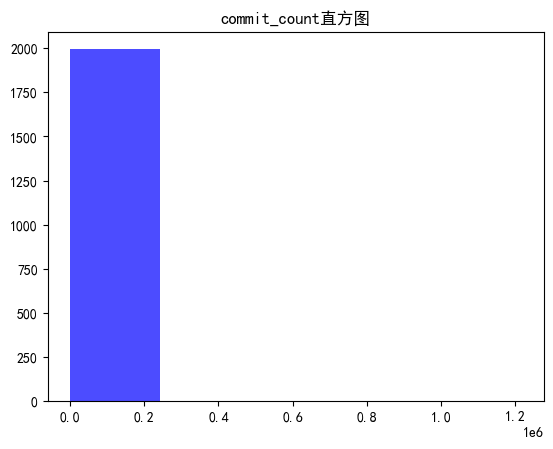

In [6]:
# 为数值列绘制直方图
for name in numeric_column:
    plt.hist(numeric_df[name], bins=5, color='blue', alpha=0.7)
    plt.title(str(name) + "直方图")
    plt.show()

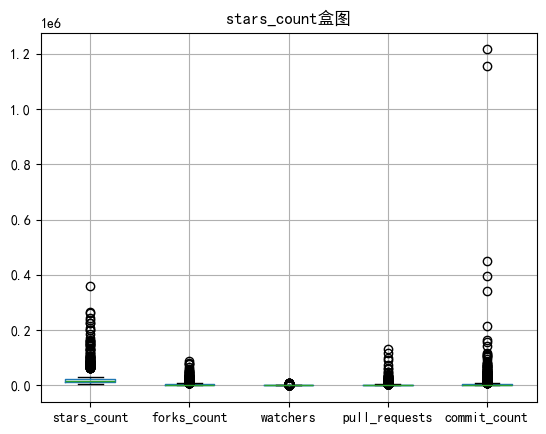

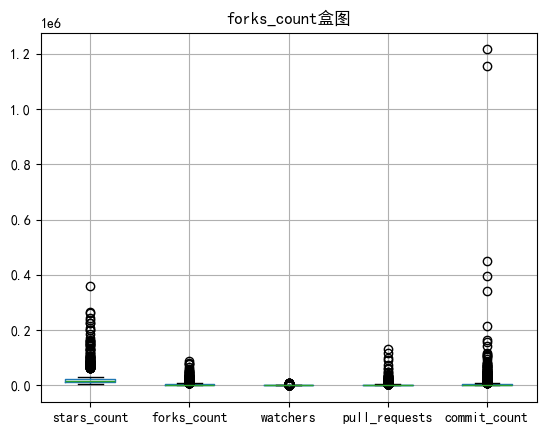

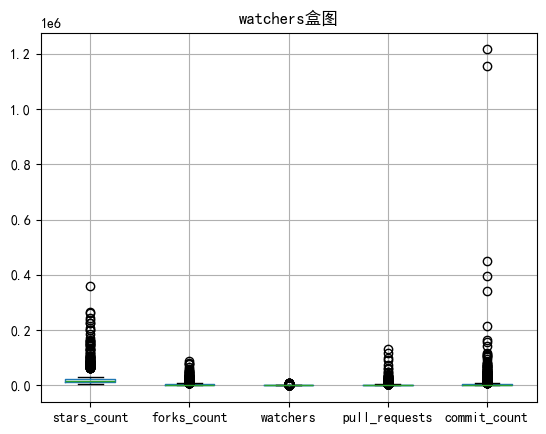

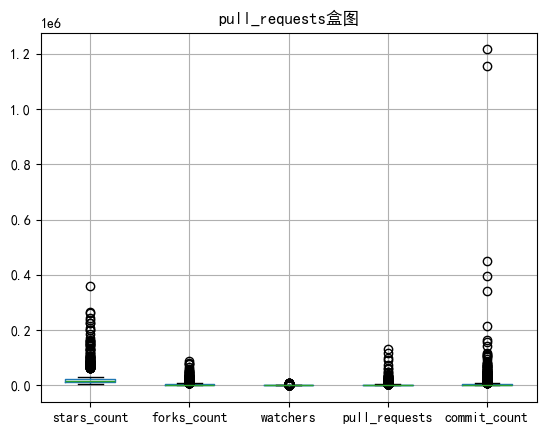

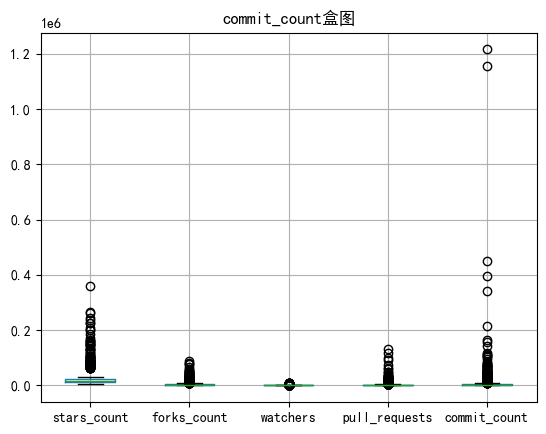

In [7]:
# 为数值列绘制盒图
for name in numeric_column:
    numeric_df.boxplot()
    plt.title(str(name) + "盒图")
    plt.show()

In [8]:
"""
创建数据处理副本
    df_cl_1：将缺失部分剔除
    df_cl_2：用最高频率值来填补缺失值
    df_cl_3：通过属性的相关关系来填补缺失值
    df_cl_4：通过数据对象之间的相似性来填补缺失值
"""

'\n创建数据处理副本\n    df_cl_1：将缺失部分剔除\n    df_cl_2：用最高频率值来填补缺失值\n    df_cl_3：通过属性的相关关系来填补缺失值\n    df_cl_4：通过数据对象之间的相似性来填补缺失值\n'

                   name  stars_count  forks_count  watchers  pull_requests  \
0          freeCodeCamp       359805        30814      8448          31867   
5     developer-roadmap       225982        32534      6885           2082   
6           public-apis       225267        25654      3772           2897   
7  system-design-primer       208977        37414      6466            455   
8                   vue       201896        33255      6051           2365   

  primary_language                                     languages_used  \
0       TypeScript  ['TypeScript', 'JavaScript', 'CSS', 'Shell', '...   
5            Astro       ['Astro', 'JavaScript', 'TypeScript', 'CSS']   
6           Python                                ['Python', 'Shell']   
7           Python                                ['Python', 'Shell']   
8       TypeScript  ['TypeScript', 'JavaScript', 'HTML', 'CSS', 'S...   

   commit_count            created_at                                  licence  
0       322

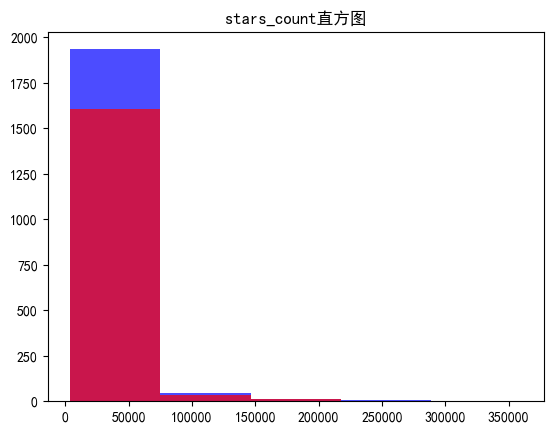

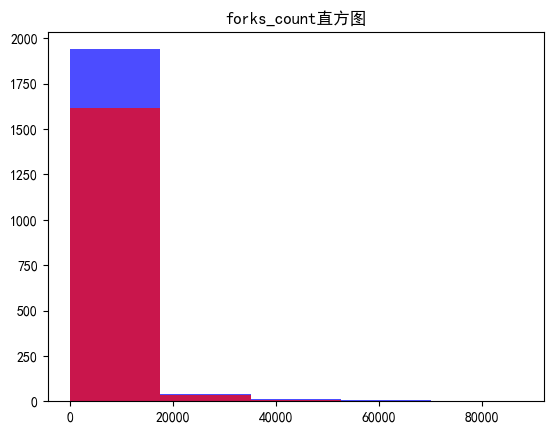

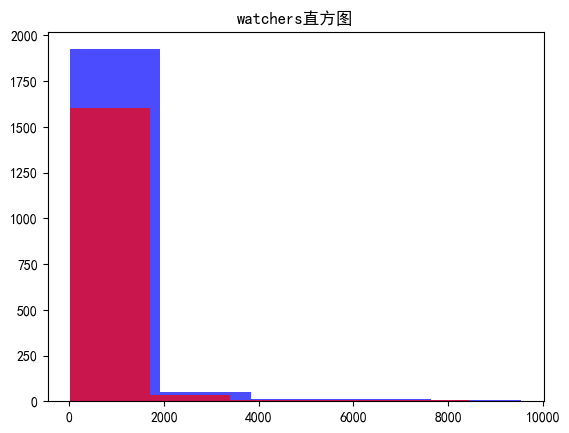

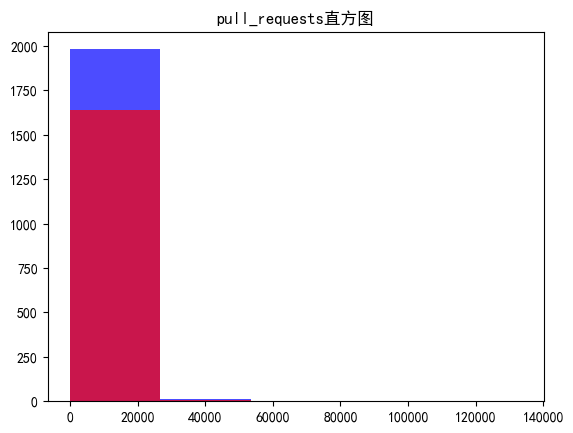

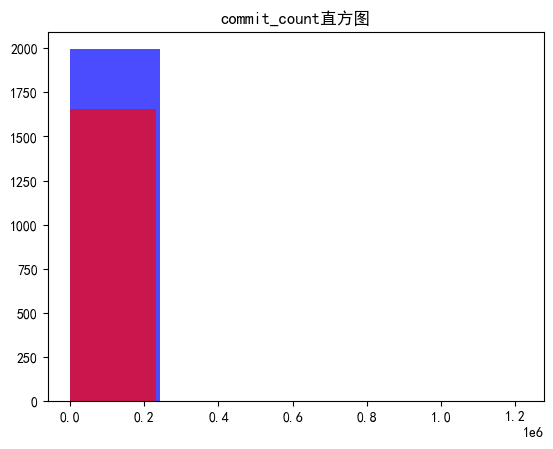

In [9]:
"""1、将缺失部分剔除"""
df_cl_1 = df.dropna()
print(df_cl_1.head())

"""对比"""
# 筛选数值列
numeric_df_1 = df_cl_1.select_dtypes(include=['int64', 'float64'])
numeric_column_1 = numeric_df_1.columns
# 给出数值列的五数概括及缺失值个数
for name in numeric_column:
    # 输出五数概括
    print("列{0}的补充前的五数概括为:\n{1}\n补充后的五数概括为:\n{2}".format(name, numeric_df[name].describe(), numeric_df_1[name].describe()))
    # 输出缺失值个数
    print("列{0}的缺失值个数为:{1}\n补充后的缺失值个数为{2}".format(name, numeric_df[name].isnull().sum(), numeric_df_1[name].isnull().sum()))
# 为数值列绘制直方图
for name in numeric_column:
    plt.hist(numeric_df[str(name)], bins=5, color='blue', alpha=0.7)
    plt.hist(numeric_df_1[str(name)], bins=5, color='red', alpha=0.7)
    plt.title(str(name) + "直方图")
    plt.show()

                          name  stars_count  forks_count  watchers  \
0                 freeCodeCamp       359805        30814      8448   
1                      996.ICU       264811        21470      4298   
2       free-programming-books       262380        53302      9544   
3  coding-interview-university       244927        65038      8539   
4                      awesome       235223        24791      7446   

   pull_requests primary_language  \
0          31867       TypeScript   
1           1949       JavaScript   
2           8235       JavaScript   
3            867       JavaScript   
4           1859       JavaScript   

                                      languages_used  commit_count  \
0  ['TypeScript', 'JavaScript', 'CSS', 'Shell', '...       32231.0   
1                                     ['JavaScript']        3189.0   
2                                     ['JavaScript']        8286.0   
3                                     ['JavaScript']        2314.0   
4     

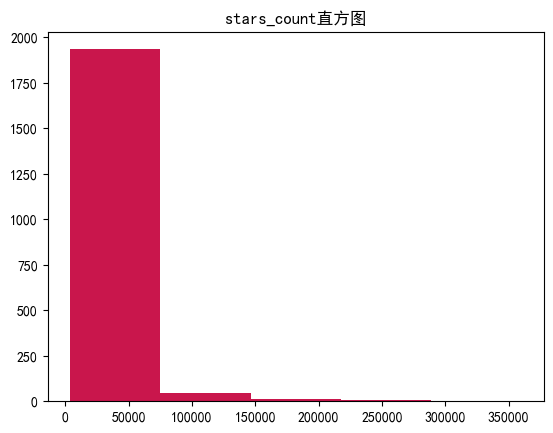

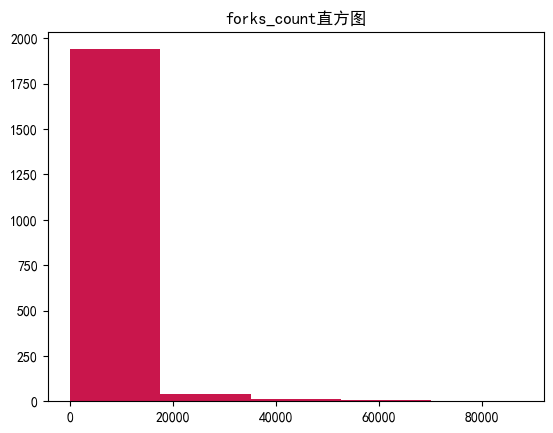

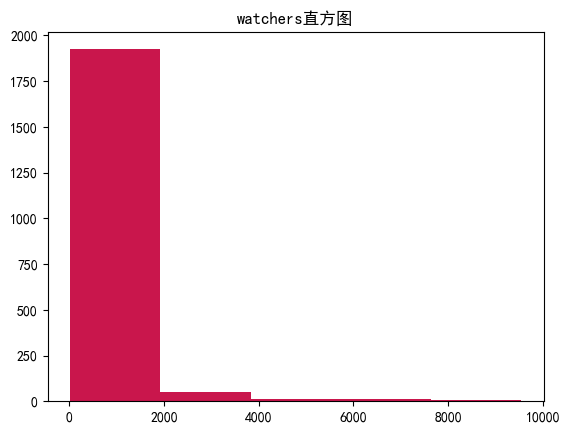

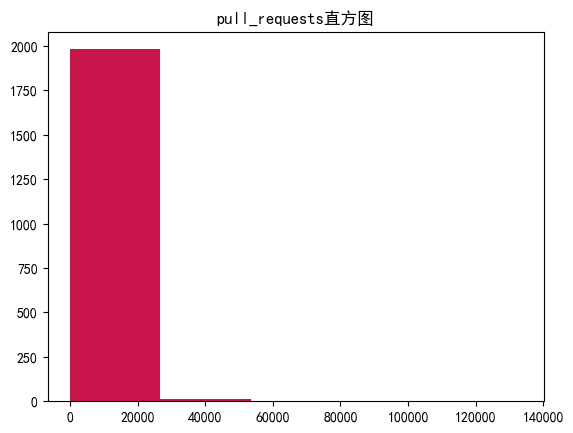

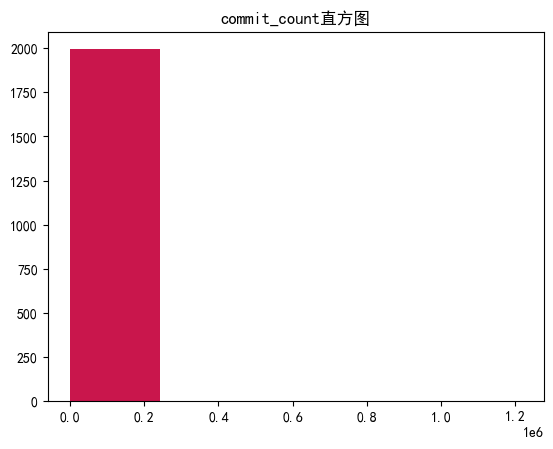

In [10]:
"""2、用最高频率值来填补缺失值"""
modes = df.mode().iloc[0] # 计算众数
df_cl_2 = df.fillna(modes)
print(df_cl_2.head())

"""对比"""
# 筛选数值列
numeric_df_2 = df_cl_2.select_dtypes(include=['int64', 'float64'])
numeric_column_2 = numeric_df_2.columns
# 给出数值列的五数概括及缺失值个数
for name in numeric_column:
    # 输出五数概括
    print("列{0}的补充前的五数概括为:\n{1}\n补充后的五数概括为:\n{2}".format(name, numeric_df[name].describe(), numeric_df_2[name].describe()))
    # 输出缺失值个数
    print("列{0}的缺失值个数为:{1}\n补充后的缺失值个数为{2}".format(name, numeric_df[name].isnull().sum(), numeric_df_2[name].isnull().sum()))
# 为数值列绘制直方图
for name in numeric_column:
    plt.hist(numeric_df[str(name)], bins=5, color='blue', alpha=0.7)
    plt.hist(numeric_df_2[str(name)], bins=5, color='red', alpha=0.7)
    plt.title(str(name) + "直方图")
    plt.show()

                          name  stars_count  forks_count  watchers  \
0                 freeCodeCamp       359805        30814      8448   
1                      996.ICU       264811        21470      4298   
2       free-programming-books       262380        53302      9544   
3  coding-interview-university       244927        65038      8539   
4                      awesome       235223        24791      7446   

   pull_requests primary_language  \
0          31867       TypeScript   
1           1949           Python   
2           8235           Python   
3            867       JavaScript   
4           1859            Astro   

                                      languages_used  commit_count  \
0  ['TypeScript', 'JavaScript', 'CSS', 'Shell', '...       32231.0   
1       ['Astro', 'JavaScript', 'TypeScript', 'CSS']        3189.0   
2  ['TypeScript', 'JavaScript', 'CSS', 'Shell', '...        8286.0   
3       ['Astro', 'JavaScript', 'TypeScript', 'CSS']        2314.0   
4     

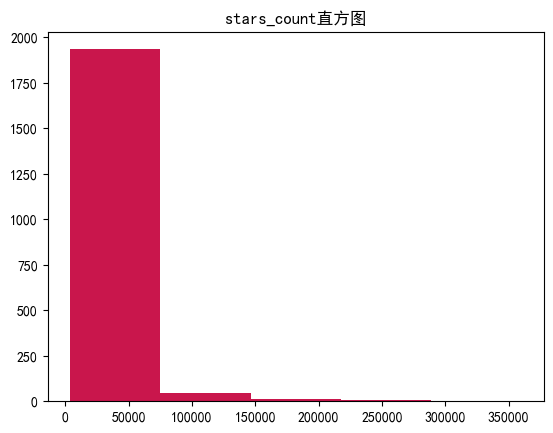

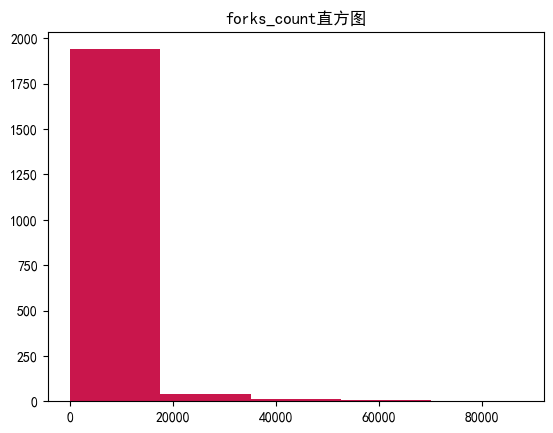

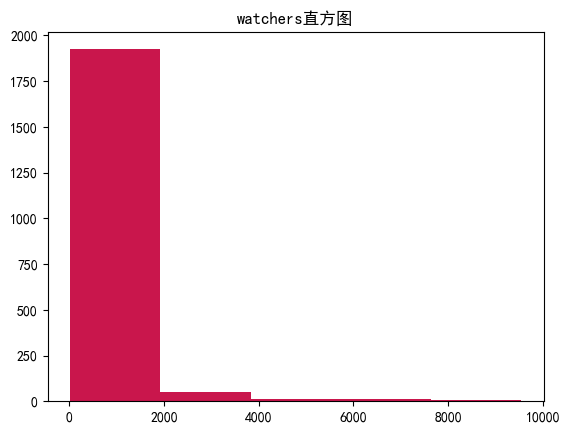

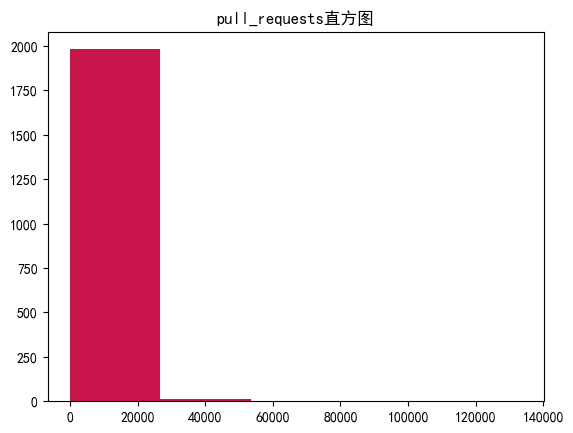

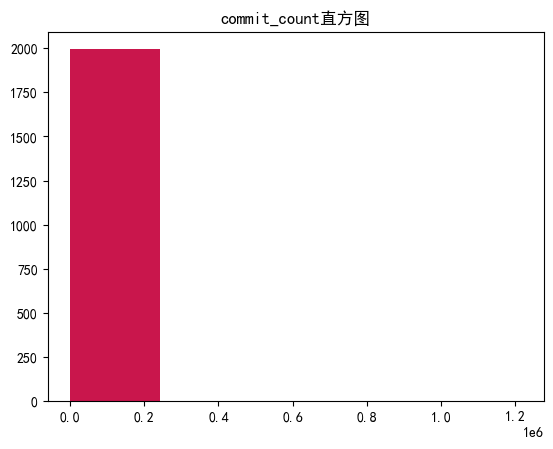

In [11]:
"""3、通过属性的相关关系来填补缺失值"""
df_cl_3 = df.copy(deep=True)
# 首先填补数值属性的缺失值
## 循环遍历数值属性列，利用其他数值属性列对缺失值进行预测（利用线性回归方法）
for name in numeric_column:
    # 划分标签数据和非标签数据
    df_labeled = df_cl_3.dropna()
    df_unlabeled = df_cl_3[df_cl_3[name].isna()]
    # 划分x，y
    X_labeled = df_labeled[[item for item in numeric_column if item != name]]
    y_labeled = df_labeled[name]
    model = LinearRegression().fit(X_labeled, y_labeled)
    # 对非标签值进行训练
    X_unlabeled = df_unlabeled[[item for item in numeric_column if item != name]]
    if X_unlabeled.shape[0] > 0:
        predicted_categories = model.predict(X_unlabeled)
        df_cl_3.loc[df_cl_3[name].isna(), name] = predicted_categories

# 然后填补标称属性的缺失值（默认数值属性填补成功）
## 循环遍历标称属性列，利用数值属性列对标称属性列的缺失值进行预测（利用随机森林算法）
for name in categorical_column:
    # 划分标签数据和非标签数据
    df_labeled = df_cl_3.dropna()
    df_unlabeled = df_cl_3[df_cl_3[name].isna()]
    # 划分x，y
    X_labeled = df_labeled[numeric_column]
    y_labeled = df_labeled[name]
    model = RandomForestClassifier()
    model.fit(X_labeled, y_labeled)
    # 对非标签值进行预测
    X_unlabeled = df_unlabeled[numeric_column]
    if X_unlabeled.shape[0] > 0:
        predicted_categories = model.predict(X_unlabeled)
        df_cl_3.loc[df_cl_3[name].isna(), name] = predicted_categories
print(df_cl_3.head())

"""对比"""
# 筛选数值列
numeric_df_3 = df_cl_3.select_dtypes(include=['int64', 'float64'])
numeric_column_3 = numeric_df_3.columns
# 给出数值列的五数概括及缺失值个数
for name in numeric_column:
    # 输出五数概括
    print("列{0}的补充前的五数概括为:\n{1}\n补充后的五数概括为:\n{2}".format(name, numeric_df[name].describe(), numeric_df_3[name].describe()))
    # 输出缺失值个数
    print("列{0}的缺失值个数为:{1}\n补充后的缺失值个数为{2}".format(name, numeric_df[name].isnull().sum(), numeric_df_3[name].isnull().sum()))
# 为数值列绘制直方图
for name in numeric_column:
    plt.hist(numeric_df[str(name)], bins=5, color='blue', alpha=0.7)
    plt.hist(numeric_df_3[str(name)], bins=5, color='red', alpha=0.7)
    plt.title(str(name) + "直方图")
    plt.show()

   stars_count  forks_count  watchers  pull_requests  commit_count  \
0     359805.0      30814.0    8448.0        31867.0       32231.0   
1     264811.0      21470.0    4298.0         1949.0        3189.0   
2     262380.0      53302.0    9544.0         8235.0        8286.0   
3     244927.0      65038.0    8539.0          867.0        2314.0   
4     235223.0      24791.0    7446.0         1859.0        1074.0   

                          name primary_language  \
0                 freeCodeCamp       TypeScript   
1                      996.ICU       ApacheConf   
2       free-programming-books       ApacheConf   
3  coding-interview-university       ApacheConf   
4                      awesome       ApacheConf   

                                      languages_used            created_at  \
0  ['TypeScript', 'JavaScript', 'CSS', 'Shell', '...  2014-12-24T17:49:19Z   
1        ['ApacheConf', 'JavaScript', 'HTML', 'CSS']  2019-03-26T07:31:14Z   
2        ['ApacheConf', 'JavaScript', 

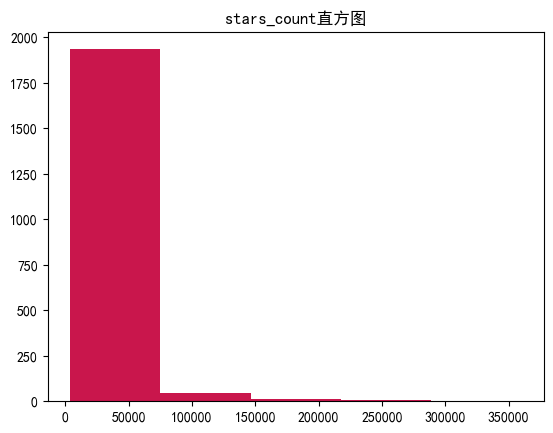

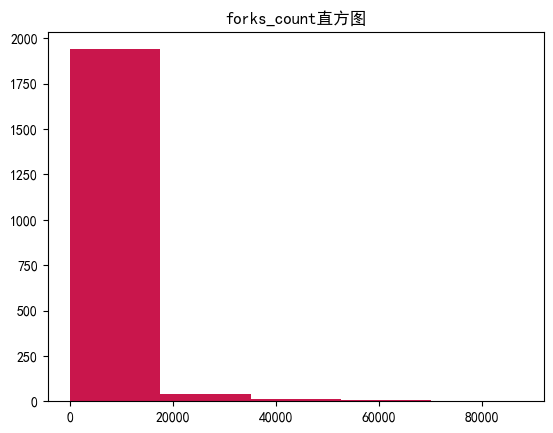

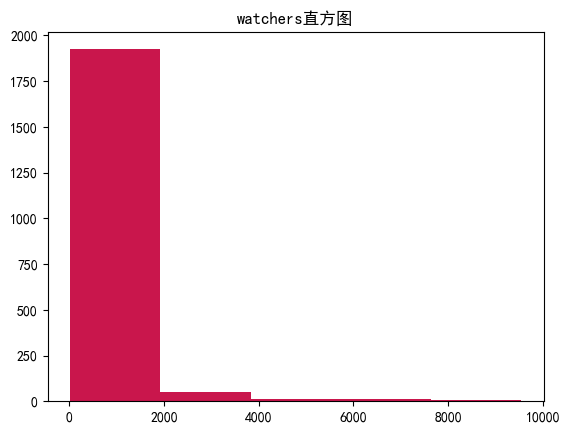

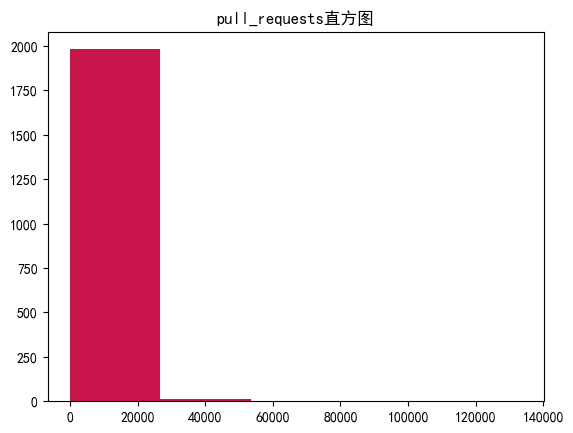

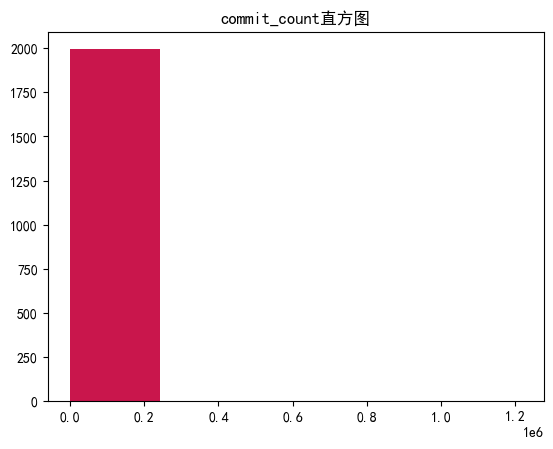

In [12]:
def undummify(df, prefix_sep="_"): # 独热编码的逆向操作
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

"""4、通过数据对象之间的相似性来填补缺失值（尝试使用k-最近邻（k-NN）算法估计对象相似性并填补缺失值）"""
df_encoded = pd.get_dummies(df, columns=categorical_column, prefix_sep=':') 
imputer = KNNImputer(n_neighbors=2) # 创建KNNImputer实例，n_neighbors是k-最近邻算法中的k值
df_cl_4 = undummify(pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns), ':')
print(df_cl_4.head())

"""对比"""
# 筛选数值列
numeric_df_4 = df_cl_4.select_dtypes(include=['int64', 'float64'])
numeric_column_4 = numeric_df_4.columns
# 给出数值列的五数概括及缺失值个数
for name in numeric_column:
    # 输出五数概括
    print("列{0}的补充前的五数概括为:\n{1}\n补充后的五数概括为:\n{2}".format(name, numeric_df[name].describe(), numeric_df_4[name].describe()))
    # 输出缺失值个数
    print("列{0}的缺失值个数为:{1}\n补充后的缺失值个数为{2}".format(name, numeric_df[name].isnull().sum(), numeric_df_4[name].isnull().sum()))
# 为数值列绘制直方图
for name in numeric_column:
    plt.hist(numeric_df[str(name)], bins=5, color='blue', alpha=0.7)
    plt.hist(numeric_df_4[str(name)], bins=5, color='red', alpha=0.7)
    plt.title(str(name) + "直方图")
    plt.show()